# Multinomial Logistic Regression

In [12]:
data <- read.csv("../../data/processed/old_train_cleaned.csv")
head(data)

,X,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,⋯,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>
1,0,1,23,12,19114.12,1824.843,3,4,3,4,⋯,1,809.98,26.82262,265,1,49.57495,80.41530,2,312.4941,0
2,1,2,23,12,19114.12,1824.843,3,4,3,4,⋯,1,809.98,31.94496,265,1,49.57495,118.28022,3,284.6292,0
3,2,3,23,12,19114.12,1824.843,3,4,3,4,⋯,1,809.98,28.60935,267,1,49.57495,81.69952,4,331.2099,0
4,3,4,23,12,19114.12,1824.843,3,4,3,4,⋯,1,809.98,31.37786,268,1,49.57495,199.45807,5,223.4513,0
5,4,5,23,12,19114.12,1824.843,3,4,3,4,⋯,1,809.98,24.79735,269,1,49.57495,41.42015,1,341.4892,0
6,5,6,23,12,19114.12,1824.843,3,4,3,4,⋯,1,809.98,27.26226,270,1,49.57495,62.43017,1,340.4792,0


In [13]:
library(e1071)
library(caTools)
library(caret)
library(nnet)
library(caret)

In [14]:
# data <- read.csv("../../data/processed/smote.csv")


X <- data[, !(names(data) %in% c("Credit_Score"))]
y <- as.factor(data$Credit_Score)  


set.seed(42) 
train_index <- createDataPartition(y, p = 0.80, list = FALSE)
X_train <- X[train_index, ]
y_train <- y[train_index]
X_test <- X[-train_index, ]
y_test <- y[-train_index]


In [15]:
# Fitting Naive Bayes Model 
# to training dataset
set.seed(120)  # Setting Seed
multinom_model <- multinom(as.factor(y_train) ~ ., data = data.frame(cbind(X_train, y_train)))
saveRDS(multinom_model, file = "../../models/mlr.rds")
multinom_model

# weights:  78 (50 variable)
initial  value 87891.180318 
iter  10 value 75636.894190
iter  20 value 69388.811619
iter  30 value 66282.131188
iter  40 value 65670.537646
iter  50 value 65025.368197
final  value 60260.004229 
converged


Call:
multinom(formula = as.factor(y_train) ~ ., data = data.frame(cbind(X_train, 
    y_train)))

Coefficients:
  (Intercept)             X       Month          Age  Occupation Annual_Income
1   -5.253917 -7.222949e-07 -0.06546632 -0.006043922 0.005453738 -2.238383e-05
2   -3.975178 -1.509821e-07 -0.05599042 -0.003365707 0.005181140 -6.471662e-06
  Monthly_Inhand_Salary Num_Bank_Accounts Num_Credit_Card Interest_Rate
1          2.702363e-04       -0.02397319       0.3374131    0.09642591
2          9.008738e-05        0.01182034       0.2392853    0.04687284
  Num_of_Loan  Type_of_Loan Delay_from_due_date Num_of_Delayed_Payment
1   0.1701026 -4.243223e-06          0.04888234           -0.034854259
2   0.1407084 -3.213271e-06          0.03545124            0.008224919
  Changed_Credit_Limit Num_Credit_Inquiries Credit_Mix Outstanding_Debt
1          -0.05638088           0.12486884   1.047623     0.0003515156
2           0.01169322           0.01578298   1.394077     0.0002567642
  Cre

In [16]:
multinom_model <- readRDS(file = "../../models/mlr.rds")
predictions <- predict(multinom_model, newdata = X_test, type = "class")  # Use type = "class" for class predictions

 

In [17]:
#C matrix
confusion_matrix <- confusionMatrix(predictions, y_test)
print(confusion_matrix)

Confusion Matrix and Statistics

          Reference
Prediction    0    1    2
         0 1962  328 1207
         1   42 3008 1442
         2 1561 2463 7985

Overall Statistics
                                          
               Accuracy : 0.6478          
                 95% CI : (0.6411, 0.6544)
    No Information Rate : 0.5318          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.3973          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       

Statistics by Class:

                     Class: 0 Class: 1 Class: 2
Sensitivity           0.55035   0.5187   0.7509
Specificity           0.90659   0.8955   0.5703
Pos Pred Value        0.56105   0.6696   0.6649
Neg Pred Value        0.90285   0.8200   0.6684
Prevalence            0.17827   0.2900   0.5318
Detection Rate        0.09811   0.1504   0.3993
Detection Prevalence  0.17487   0.2246   0.6005
Balanced Accuracy     0.72847

In [18]:

# Extract TP, TN, FP, FN from the confusion matrix
TP <- confusion_matrix$table[2, 2]  # True Positives
TN <- confusion_matrix$table[1, 1]  # True Negatives
FP <- confusion_matrix$table[1, 2]  # False Positives
FN <- confusion_matrix$table[2, 1]  # False Negatives

# Calculate accuracy
accuracy <- sum(diag(confusion_matrix$table)) / sum(confusion_matrix$table)

# Calculate precision
precision <- TP / (TP + FP)

# Calculate recall (sensitivity)
recall <- TP / (TP + FN)

# Calculate F1 score
f1_score <- 2 * ((precision * recall) / (precision + recall))

# Calculate specificity
specificity <- TN / (TN + FP)

# Print the metrics
cat("Accuracy:", accuracy, "\n")
cat("Precision:", precision, "\n")
cat("Recall (Sensitivity):", recall, "\n")
cat("F1 Score:", f1_score, "\n")
cat("Specificity:", specificity, "\n")

Accuracy: 0.6478148 
Precision: 0.9016787 
Recall (Sensitivity): 0.9862295 
F1 Score: 0.9420608 
Specificity: 0.8567686 


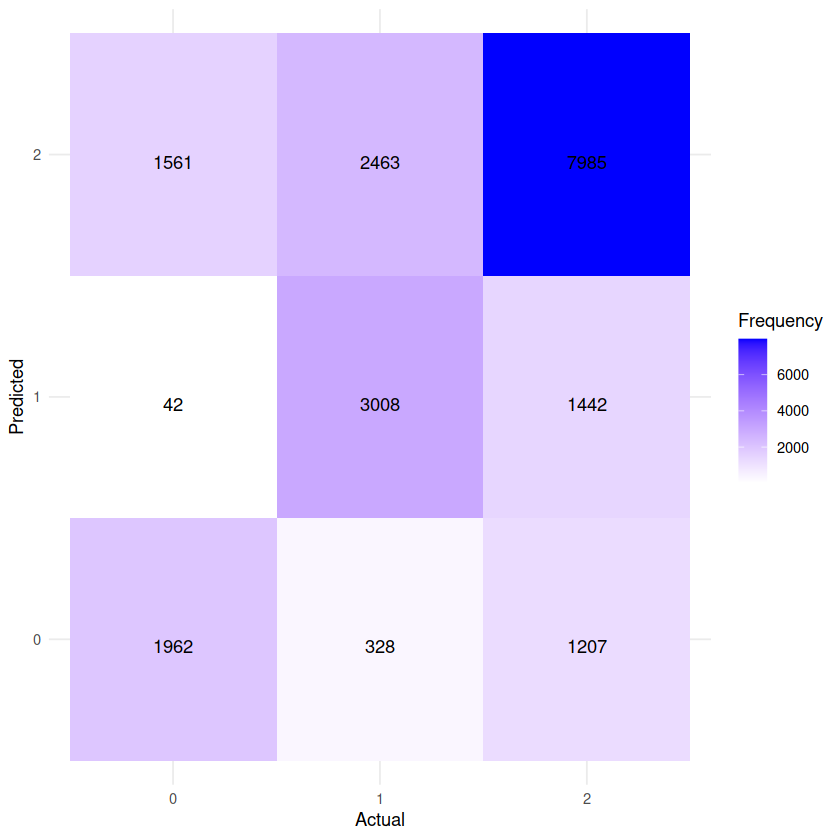

In [19]:
# Visualize the confusion matrix
plot_confusion <- ggplot(as.data.frame(confusion_matrix$table), aes(x = Reference, y = Prediction, fill = Freq)) +
  geom_tile() +
  geom_text(aes(label = Freq), vjust = 1) +
  scale_fill_gradient(low = "white", high = "blue") +
  labs(x = "Actual", y = "Predicted", fill = "Frequency") +
  theme_minimal()

# Print the plot
print(plot_confusion)

In [20]:
cm <- table(y_test, predictions)
cm

      predictions
y_test    0    1    2
     0 1962   42 1561
     1  328 3008 2463
     2 1207 1442 7985

In [21]:
confusionMatrix(cm)

Confusion Matrix and Statistics

      predictions
y_test    0    1    2
     0 1962   42 1561
     1  328 3008 2463
     2 1207 1442 7985

Overall Statistics
                                          
               Accuracy : 0.6478          
                 95% CI : (0.6411, 0.6544)
    No Information Rate : 0.6005          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.3973          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       

Statistics by Class:

                     Class: 0 Class: 1 Class: 2
Sensitivity           0.56105   0.6696   0.6649
Specificity           0.90285   0.8200   0.6684
Pos Pred Value        0.55035   0.5187   0.7509
Neg Pred Value        0.90659   0.8955   0.5703
Prevalence            0.17487   0.2246   0.6005
Detection Rate        0.09811   0.1504   0.3993
Detection Prevalence  0.17827   0.2900   0.5318
Balanced Accuracy     0.73195   0.7448   0.6667